# Process BOLFI reconstructed positions
First test, all default settings

*Bart Pelssers, 25-04-2018*

In [6]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [7]:
data = defaultdict(list)

filename = "bolfi_result_%d.pkl"
for i in range(230):
    with open(filename % i, 'rb') as f:
        single = pickle.load(f)
    if i == 0:
        algos = list(single.keys())
    for k, v in single.items():
        for dim in ['x', 'y']:
            data[k + '_' + dim].append(v[dim])

algos.remove('truth')

In [8]:
df = pd.DataFrame(data)
df.head()

,BOLFI_x,BOLFI_y,PosRecNeuralNet_x,PosRecNeuralNet_y,PosRecTopPatternFit_x,PosRecTopPatternFit_y,truth_x,truth_y
0,3.302292,-17.485171,1.786555,-19.403941,2.618421,-19.077068,2.626434,-17.960824
1,11.077475,-5.709287,10.707879,-5.763074,10.847744,-6.109649,10.907536,-6.312277
2,2.516583,37.081622,2.433883,36.790922,2.618421,36.782581,2.726006,37.749081
3,-21.462203,-3.862630,-22.111083,-4.495438,-22.069549,-4.364035,-21.259064,-4.445240
4,-18.910309,-24.013093,-18.213372,-24.521047,-18.578321,-23.565789,-18.078293,-23.212466


In [15]:
print('Mean distance from true position over %d reconstructed events' % len(df))
for algo in algos:
    df[algo + '_d'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2)**0.5
    print(algo, "%.2f cm" % df[algo + '_d'].mean())

Mean distance from true position over 230 reconstructed events
BOLFI 0.86 cm
PosRecTopPatternFit 0.65 cm
PosRecNeuralNet 0.82 cm


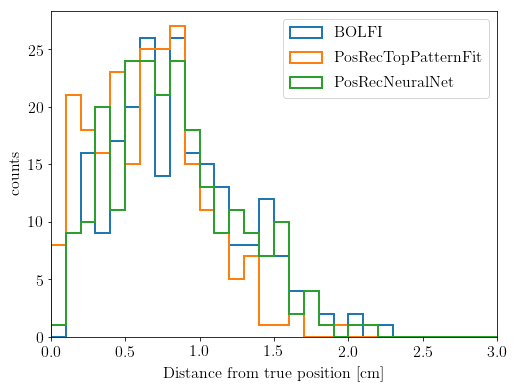

In [10]:
plt.figure(figsize=(8,6))
for algo in algos:
    plt.hist(df[algo + '_d'], bins = 30, range=(0, 3), histtype='step', linewidth=2, label=algo)
plt.legend()
plt.xlabel('Distance from true position [cm]')
plt.ylabel('counts')
plt.xlim(0, 3)
plt.show()

In [12]:
#plt.figure(figsize=(8, 8))
#plt.scatter(df['truth_x'], df['truth_y'], s=4)
#plt.scatter(df['BOLFI_x'], df['BOLFI_y'], s=4)
#plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False))
#plt.gca().set_aspect(1)
#plt.xlim(-50, 50)
#plt.ylim(-50, 50)
#plt.show()

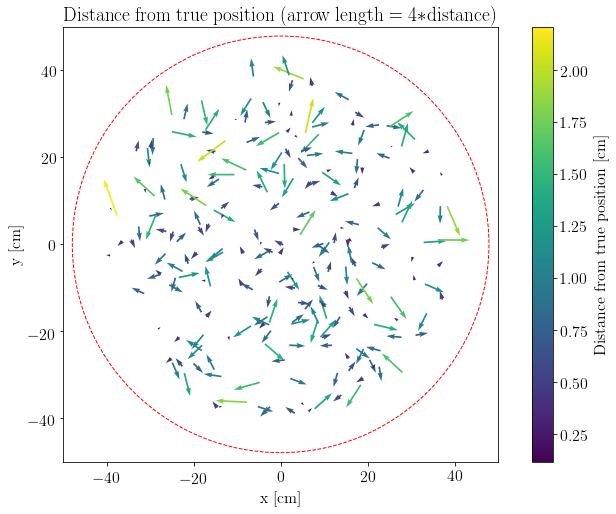

In [14]:
plt.figure(figsize =(12,8))
plt.quiver(df['truth_x'], df['truth_y'],
           df['BOLFI_x'] - df['truth_x'], df['BOLFI_y'] - df['truth_y'],
           df['BOLFI_d'],
           pivot='tail', angles='xy', scale_units='xy', scale=0.25)
plt.colorbar(label='Distance from true position [cm]')
plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False, linestyle='--'))
plt.gca().set_aspect(1)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Distance from true position (arrow length $= 4 * $distance)')
#plt.savefig('bolfi_vectors.png', dpi=150)
plt.show()